In [ ]:
import sys
sys.path.append("/home/users/dprimosc/L1METML")

import uproot
import os 
import h5py
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import mplhep as hep
import hist
from L1METML.utils import ShapeVar


ModuleNotFoundError: No module named 'L1METML'

In [2]:
h5_file = "/ceph/cms/store/user/dprimosc/l1deepmet_data/25May15_140X_v0/perfNano_TT_PU200.h5"

with h5py.File(h5_file, "r") as f:
    X = f["X"][:]  # Load entire dataset
    Y = f["Y"][:]
    
    print(f"X shape: {X.shape}, Y shape: {Y.shape}")
    
    # Show a few samples
    print("First X sample:\n", X[0, 0,0])
    print("First Y sample:\n", Y[0])

X shape: (298999, 128, 8), Y shape: (298999, 2)
First X sample:
 2.25
First Y sample:
 [ 9.49965668 34.8512764 ]


In [4]:
with h5py.File(h5_file, "r") as f:
    if "feature_names" in f:
        feature_names = f["feature_names"][:]
        print("Feature names:", feature_names)
    elif "X_names" in f:
        feature_names = f["X_names"][:]
        print("Feature names:", feature_names)

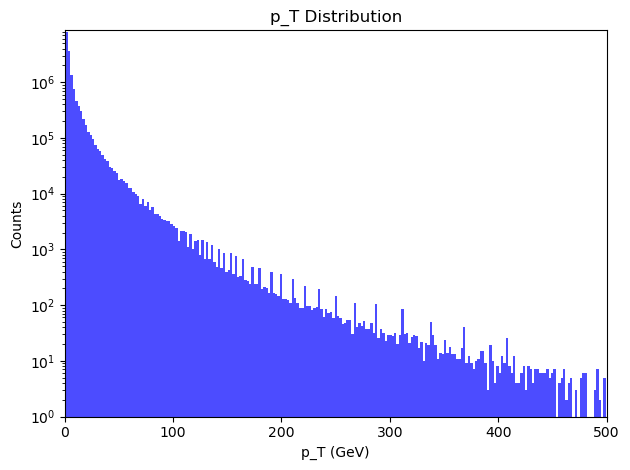

In [ ]:
# Plot histograms for each feature
num_features = X.shape[2]

# Count zero values for p_T
# NB: p_T is ordered
'''
num_zeros_X = np.sum(X[:, 5, 0] == 0)
num_non_zeros_X = np.sum(X[:, 5, 0] != 0)
percent_zeros_X = (num_zeros_X / (num_zeros_X + num_non_zeros_X)) * 100

print(f"Number of zero values in X: {num_zeros_X}")
print(f"Number of non-zero values in X: {num_non_zeros_X}")
'''
p_T = X[:, :, 0].flatten()
p_T_nonzero = p_T[p_T != 0]

fig, axes = plt.subplots()

ax = axes
ax.hist(p_T_nonzero, bins=500, alpha=0.7, color="blue")
ax.set_title(f"p_T Distribution")
ax.set_xlabel(f"p_T (GeV)")
ax.set_xlim(0, 500)
ax.set_ylim(1, 8500000)
ax.set_ylabel("Counts")
ax.set_yscale("log")

cat_axis = hist.axis.StrCategory([], name="cat", label="cat", growth=True)
p_T_var = ShapeVar(var="H1Msd", label=r"$m_{SD}^{1}$ (GeV)", bins=[30, 0, 300])
h = hist.Hist(cat_axis, shape_var.axis)
            
h.fill(key, X_train.loc[key, shape_var.var], weight=weights_train[key])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
hep.histplot(
            h[{"cat": key}],
            ax=ax,
            label=f"{legends[key]}",
            histtype="step",
            linewidth=1,
            color='blue',
            density=True,
            flow="none",
                )

plt.tight_layout()
plt.show()

assert not np.isnan(X).any(), "X contains NaN values!"
assert not np.isnan(Y).any(), "Y contains NaN values!"
assert not np.isinf(X).any(), "X contains infinite values!"
assert not np.isinf(Y).any(), "Y contains infinite values!"

